# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [48]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [49]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [50]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [52]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 123 entries, SK_ID_CURR to DAYS_EMPLOYED_ANOM
dtypes: bool(1), float64(66), int32(3), int64(40), object(13)
memory usage: 283.0+ MB


In [53]:
app_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'DAYS_EMPLOYED_ANOM'],
      dtype='object', length=123)

#### HW
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [54]:
app_train['DAYS_BIRTH'].value_counts()

13749    43
13481    42
10020    41
18248    41
15771    40
         ..
7861      1
25017     1
25135     1
7856      1
24328     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64

In [55]:
app_train['DAYS_BIRTH_YEARS'] = app_train['DAYS_BIRTH']/(365)

In [56]:
app_train['DAYS_BIRTH_YEARS'].value_counts()

37.668493    43
36.934247    42
49.994521    41
27.452055    41
28.197260    40
             ..
68.416438     1
68.942466     1
21.408219     1
68.808219     1
68.580822     1
Name: DAYS_BIRTH_YEARS, Length: 17460, dtype: int64

In [57]:
# 等寬 分五份
app_train['DAYS_BIRTH_YEARS_grp']= pd.cut(app_train['DAYS_BIRTH_YEARS'],5)

In [58]:
app_train['DAYS_BIRTH_YEARS_grp'].value_counts()

(30.238, 39.959]    80188
(39.959, 49.679]    74661
(49.679, 59.4]      66194
(20.469, 30.238]    46806
(59.4, 69.121]      39662
Name: DAYS_BIRTH_YEARS_grp, dtype: int64

Text(0.5, 1.0, 'DAYS_BIRTH_YEARS_grp v.s TARGET')

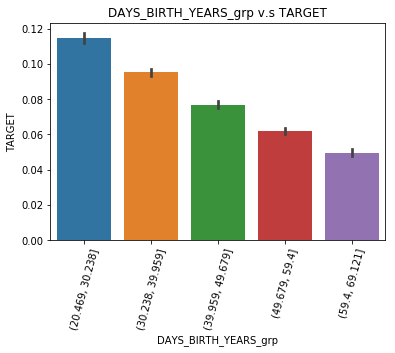

In [59]:
sns.barplot(app_train['DAYS_BIRTH_YEARS_grp'],app_train['TARGET'])
plt.xticks(rotation=75)
plt.xlabel('DAYS_BIRTH_YEARS_grp')
plt.ylabel('TARGET')
plt.title('DAYS_BIRTH_YEARS_grp v.s TARGET')

In [60]:
# 等頻 分五份
app_train['DAYS_BIRTH_YEARS_grp2']= pd.qcut(app_train['DAYS_BIRTH_YEARS'],5)

In [61]:
app_train['DAYS_BIRTH_YEARS_grp2'].value_counts()

(20.517, 32.038]    61512
(39.496, 47.178]    61509
(32.038, 39.496]    61504
(56.093, 69.121]    61495
(47.178, 56.093]    61491
Name: DAYS_BIRTH_YEARS_grp2, dtype: int64

Text(0.5, 1.0, 'DAYS_BIRTH_YEARS_grp2 v.s TARGET')

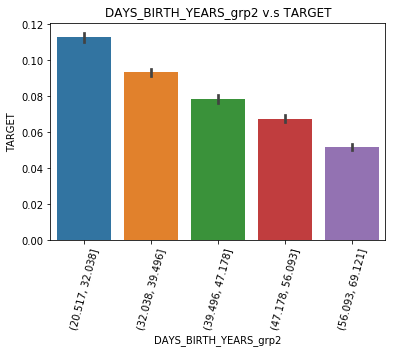

In [62]:
sns.barplot(app_train['DAYS_BIRTH_YEARS_grp2'],app_train['TARGET'])
plt.xticks(rotation=75)
plt.xlabel('DAYS_BIRTH_YEARS_grp2')
plt.ylabel('TARGET')
plt.title('DAYS_BIRTH_YEARS_grp2 v.s TARGET')

#### 觀察 AMT_INCOME_TOTAL

In [63]:
app_train['AMT_INCOME_TOTAL'].value_counts()

135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
101119.5        1
79425.0         1
101128.5        1
202275.0        1
262174.5        1
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: int64

In [64]:
app_train['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [65]:
new_max = np.percentile(app_train['AMT_INCOME_TOTAL'],q=99)
app_train['AMT_INCOME_TOTAL_MODIFIED'] = app_train['AMT_INCOME_TOTAL'].apply(lambda x : new_max if x > new_max else x)

In [66]:
app_train['AMT_INCOME_TOTAL_MODIFIED'].describe()

count    307511.000000
mean     166025.922341
std       83063.469251
min       25650.000000
25%      112500.000000
50%      147150.000000
75%      202500.000000
max      472500.000000
Name: AMT_INCOME_TOTAL_MODIFIED, dtype: float64

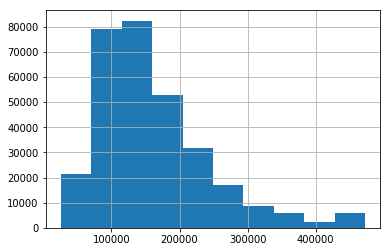

In [67]:
app_train['AMT_INCOME_TOTAL_MODIFIED'].hist()

In [68]:
app_train['AMT_INCOME_TOTAL_MODIFIED_grp'] = pd.cut(app_train['AMT_INCOME_TOTAL_MODIFIED'],5)

In [69]:
app_train['AMT_INCOME_TOTAL_MODIFIED_grp'].value_counts()

(115020.0, 204390.0]    135302
(25203.15, 115020.0]    100702
(204390.0, 293760.0]     48625
(293760.0, 383130.0]     14593
(383130.0, 472500.0]      8289
Name: AMT_INCOME_TOTAL_MODIFIED_grp, dtype: int64

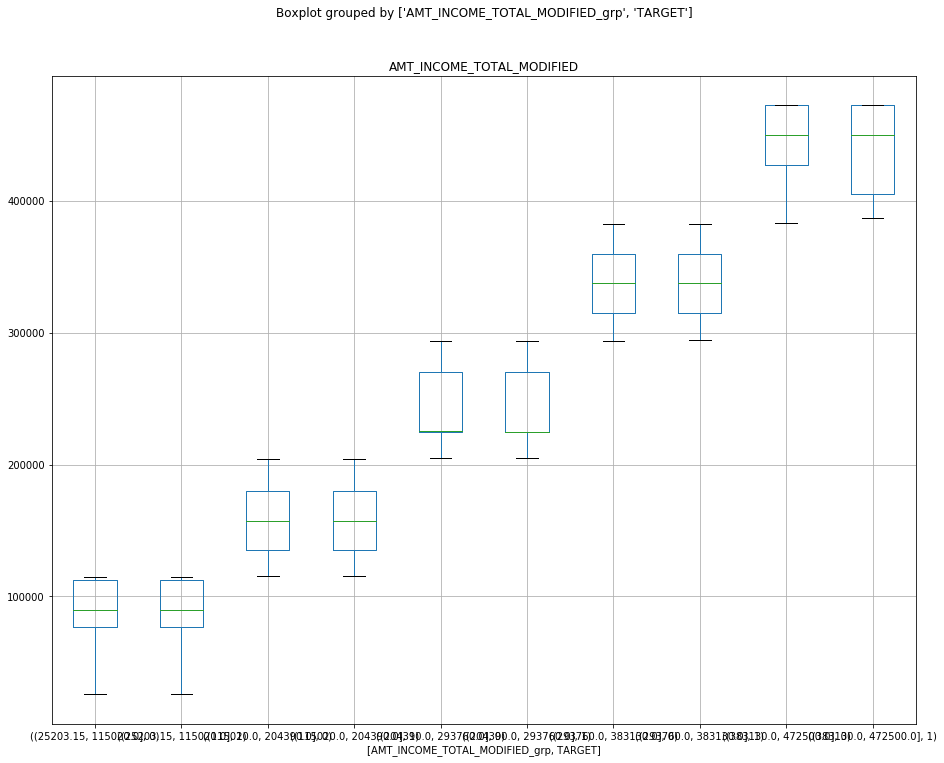

In [70]:
app_train.boxplot(column = ['AMT_INCOME_TOTAL_MODIFIED'],by=['AMT_INCOME_TOTAL_MODIFIED_grp','TARGET'],figsize=(15,12))

In [71]:
app_train['AMT_INCOME_TOTAL_MODIFIED_grp2'] = pd.qcut(app_train['AMT_INCOME_TOTAL_MODIFIED'],5)

In [72]:
app_train['AMT_INCOME_TOTAL_MODIFIED_grp2'].value_counts()

(99000.0, 135000.0]     85756
(162000.0, 225000.0]    75513
(25649.999, 99000.0]    63671
(225000.0, 472500.0]    47118
(135000.0, 162000.0]    35453
Name: AMT_INCOME_TOTAL_MODIFIED_grp2, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000259BE2F01D0>,
      dtype=object)

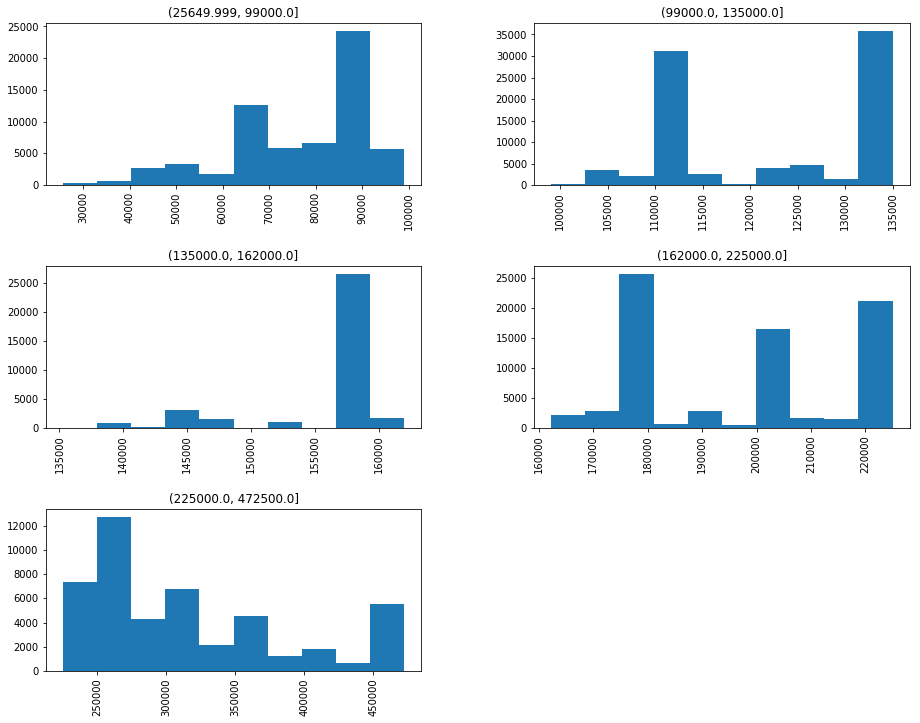

In [73]:
app_train['AMT_INCOME_TOTAL_MODIFIED'].hist(by=app_train['AMT_INCOME_TOTAL_MODIFIED_grp2'],figsize=(15,12))